In [ ]:
# Kết nối với Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!apt install unzip
#!cd "/content/drive/MyDrive/Colab Notebooks/"
#!unzip -u "/content/drive/MyDrive/Colab Notebooks/dataset.zip" -d "/content/drive/MyDrive/Colab Notebooks/dataset"
#!unzip -u "/content/drive/MyDrive/Colab Notebooks/LabDL/Benign-20210323T020736Z-001.zip" -d "/content/drive/MyDrive/Colab Notebooks/LabDL/dataset"
#!unzip -u "/content/drive/MyDrive/Colab Notebooks/LabDL/Benign-20210323T020736Z-002.zip" -d "/content/drive/MyDrive/Colab Notebooks/LabDL/dataset"


# **Giải thích thư viện**
`import numpy as np` Xử lý một số toán học

`import matplotlib.pyplot as plt`  Thư viện đồ thị trực quan, hình ảnh,...

`from pathlib import Path`

`import os`

`import cv2`   Xử lý chuyển đổi đồng nhất kích thước, màu sắc ảnh

`import random`

`import pickle`  Lưu 

`import tensorflow as tf`

`from tensorflow.keras.models import Sequential`   Khỏi tạo một mô hình neural network

`from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D`

`Dense` là tạo một layer

`Activation` là hàm kích hoạt

`Flatten` là layer làm phẳng từ ma trân m x n sang ma tran 1 x k

`Conv2D` ~ Convolutional 2D mạng tích chập 2 chiều

`MaxPool2D` là hàm tinh giảm số neural

`from tensorflow.keras.utils import to_categorical`  One hot

`from sklearn.model_selection import train_test_split`   train test validation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # Xử lý một số toán học
import matplotlib.pyplot as plt # Thư viện đồ thị trực quan, hình ảnh,...
from pathlib import Path
import os
import cv2 
import random
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

`data_dir = Path(data_dir)`    Chuyển đường dẫn đến dataset thành một Path Object

`categories = os.listdir(data_dir)` 
 Vì cấu trúc file là :

```
path/to/image_dir/
  split_name/  # Ex: 'train'
      label1/  # Ex: 'airplane' or '0015'
          xxx.png
          xxy.png
          xxz.png
      label2/
          xxx.png
          xxy.png
          xxz.png
      split_name/  # Ex: 'test'

```
=> nên ta muốn lưu toàn bộ label vào trong categories

Bộ dữ liệu này có tới 17 label; `80 samples/1 label => có 80 * 17 = 1360` samples

Chạy lênh sau để in ra số ảnh trong dataset:
```
count_image = len(list(data_dir.glob("*/*.jpg")))
print(count_image)
```
jpg là đuôi ảnh, */*.jpg nghĩa là ngay sau đường dẫn đễn dataset * đầu tiên là mở toàn bộ folder ngay cùng cấp ngay sau đó (tức là label1, label2, ...) / * là chọn tất cả tên file với đuôi là jpg. Trong trường hợp ảnh có nhiều loài thì chọn `.*` để chọn toàn bộ loại ảnh (cần lưu ý dữ liệu lúc này có chắc chắn toàn bộ ảnh hay không, hoặc là design theo những đuôi ảnh nhất định thì tốt hơn)

Chạy: `print(len(categories))` để xem số lượng label


In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset"
data_dir = Path(data_dir)  
categories = os.listdir(data_dir) 

In [ ]:
count_image = len(list(data_dir.glob("*/*.tif")))
print(count_image)
print(len(categories))

492
4


In [ ]:
#categories.index('InSitu')
categories.index('Normal')

1

# **Quá trình tạo tập dữ liệu**

In [ ]:
training_data = []  # Toàn bộ dữ liệu chúng ta có thể sử dụng, phân biệt giữa training data, x_train, y_train, x_test, y_test, x_val và y_val
# training data = [x_train, y_train] + [x_test, y_test] + [x_val, y_val]
#500
IMG_SIZE = 250  # Trong hướng dẫn này, lựa chọn đưa toàn bộ ảnh về cùng kích thước 200 x 200, (bộ dữ liệu với nhiều loại kích thước ảnh)
def create_training_data():
  for category in categories: # Duyệt qua từng folder label
    path = os.path.join(data_dir, category) # tạo một path tạm đến folder label đó 
    label_number = categories.index(category) # label thứ mấy trong mảng categories chứa các label
    for img in os.listdir(path):  # duyệt qua toàn bộ ảnh trong path
      try:
        img_array_gray = cv2.imread(os.path.join(path, img), cv2.IMREAD_ANYCOLOR) # Đọc mảng giá trị của ảnh, ở đây không chuyển ảnh thành gray
        new_img_array = cv2.resize(img_array_gray, (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_AREA)  # Chuyển ảnh về cùng kích thước
        training_data.append([new_img_array, label_number]) # Lưu ảnh cùng label tương ứng vào training_data
      except Exception as e:
        pass

create_training_data()


In [ ]:
print(len(training_data))

492


In [ ]:
random.shuffle(training_data) # xáo trộn dữ liệu

In [ ]:
# Tạo 2 mảng để lưu samples và labels theo cùng index tương ứng
X = []  # samples
y = []  # labels

In [ ]:
for feature, label in training_data:  # Mỗi phần tử trong training_data có dạng [feature, label] trong đó feature = new_img_array và label = label_number
  X.append(feature)
  y.append(label)

# X bây giờ chứa toàn bộ features
# Chuyển X về dạng ma trận
# -1 ở đây tương đương với số lượng features, dùng -1 numpy tự hiểu là ứng với số lượng của feature hiện có trong X
# Vì không chuyển thành ảnh trắng đen nên ảnh có 3 kênh màu, tham số cuối cùng trong reshape
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

Tách training_data thành tập train và test.
*   X_train, y_train
*   X_test, y_test

---
Tập test sẽ có kích thước bằng 20% data set




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(len(X_train))

393


In [ ]:
print(len(X_test))

99


In [ ]:
# Bước này dùng để lưu X và y vào một file theo định dạng có cấu trúc để khỏi phải chạy lại hàm tạo X, y phía trên - khá tốn thời gian cho việc tạo lại từ đầu
pickle_out = open("/content/drive/MyDrive/Colab Notebooks/X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/Colab Notebooks/y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

#train
pickle_out = open("/content/drive/MyDrive/Colab Notebooks/X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/Colab Notebooks/y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

#test
pickle_out = open("/content/drive/MyDrive/Colab Notebooks/X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/Colab Notebooks/y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [ ]:
# Đọc lại file cấu trúc đã lưu
#pickle_in = open("/content/drive/MyDrive/Colab Notebooks/LabDL/X.pickle", "rb")
#X = pickle.load(pickle_in)
#pickle_in.close()

#pickle_in = open("/content/drive/MyDrive/Colab Notebooks/LabDL/y.pickle", "rb")
#y = pickle.load(pickle_in)
#pickle_in.close()

#train
pickle_in = open("/content/drive/MyDrive/Colab Notebooks/X_train.pickle", "rb")
X_train = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("/content/drive/MyDrive/Colab Notebooks/y_train.pickle", "rb")
y_train = pickle.load(pickle_in)
pickle_in.close()

#test
pickle_in = open("/content/drive/MyDrive/Colab Notebooks/X_test.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("/content/drive/MyDrive/Colab Notebooks/y_test.pickle", "rb")
y_test = pickle.load(pickle_in)
pickle_in.close()

In [ ]:
#X = X/255  # Tinh giảm giá trị trong điểm ảnh (vì giá trị màu chạy từ 0 --> 255 nên mới có con số 255 ở đây)
#y = to_categorical(y) # one hot
# ví dụ y_number = 14 thì y = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

X_train = X_train/255
y_train = to_categorical(y_train)

X_test = X_test/255
y_test = to_categorical(y_test)

# **Xây dựng model**

In [ ]:
# load lại model cũ đã lưu
#model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/LabDL/my_model/my_model.h5')
#model.summary()

In [ ]:
model = Sequential() #  Khởi tạo một một mô hình neural

# Bắt đầu của mạng thêm một Convolutional layer với các tham số trên
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
# Lớp ban đầu này phải truyền cho mạng biết input_shape ban đầu là bao nhiêu chính là (weight x heigh x depth) của ảnh
# padding chỉ có thể chọn 1 trong 2 giá trị `same` hoặc `valid`
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=X.shape[1:], padding="same"))

# Thêm cho layer trên một hàm kích hoạt
model.add(Activation("relu"))
# Tinh giảm số neural của output nếu cần thiết
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# Làm phẳng neuron, bắt đầu fully connected
model.add(Flatten())

# Tạo một layer
model.add(Dense(128))
# Thêm hàm kích hoạt
model.add(Activation("relu"))
#model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(64))
model.add(Activation("relu"))

# output
model.add(Dense(4))
model.add(Activation("softmax"))

# Cung cấp cho mô hình hàm loss function lựa chọn, thuật toán tối ưu
model.compile('adam', 'binary_crossentropy', metrics='accuracy')
model.summary() # xem chi tiết mô hình xây dựng của chính mình

# Cuối cùng đào tạo nó
history = model.fit(X_train, y_train, batch_size=128, epochs=200)

!mkdir -p saved_model
model.save('/content/drive/MyDrive/Colab Notebooks/my_model/my_model.h5') 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 250, 250, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 123, 123, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 123, 123, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        3

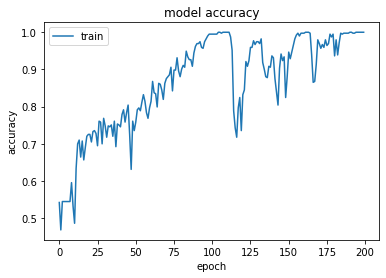

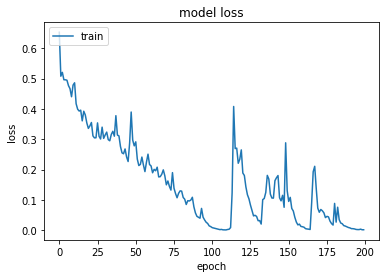

In [ ]:
# list all data in history
#print(history.history.keys())
#print(model.metrics_names)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

NameError: ignored

In [ ]:
# Cuối cùng là dùng một mẫu để dự đoán
i=100
y_hat = model.predict(X_test[i:i+1])
y_label = np.argmax(y_hat, axis=1)
print(y_label)
print(y_test[i])

ValueError: ignored